<a href="https://colab.research.google.com/github/Imran1hp/Background-color-changing-website/blob/main/Taxi_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install opendatasets --upgrade --quiet
!pip install plotly matplotlib seaborn --quiet
!pip install scikit-learn --quiet
!pip install numpy pandas --quiet

In [6]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset_url = 'https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data'

In [129]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:23<00:00, 72.5MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
Skipping, found downloaded files in "./new-york-city-taxi-fare-prediction" (use force=True to force download)


In [9]:
import os

In [10]:
data_dir='./new-york-city-taxi-fare-prediction'

In [11]:
os.listdir(data_dir)

['train.csv',
 'GCP-Coupons-Instructions.rtf',
 'test.csv',
 'sample_submission.csv']

In [12]:
train_file = data_dir+'/train.csv'

In [13]:
test_file =data_dir+'/test.csv'

In [14]:
import pandas as pd

In [15]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Oct  1 14:11 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Oct  1 14:11 sample_submission.csv
-rw-r--r-- 1 root root 960K Oct  1 14:11 test.csv
-rw-r--r-- 1 root root 5.4G Oct  1 14:12 train.csv


In [16]:
!head {train_file}

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [17]:
!head {test_file}

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [18]:
!wc -l {train_file}

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [19]:
!wc -l {test_file}

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [20]:
import pandas as pd
import random

In [21]:
sample_frac =0.01

In [22]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'

In [23]:
dtype = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

def skip_row(row_idx):
  if row_idx ==0:
    return False
  return random.random()>sample_frac
random.seed(42)
df= pd.read_csv(train_file,usecols=selected_cols.split(','),dtype=dtype,parse_dates =['pickup_datetime'] ,skiprows=skip_row)


In [24]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


In [25]:
test_df  = pd.read_csv(test_file,dtype=dtype,parse_dates=['pickup_datetime'])

In [26]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [28]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [29]:
df.pickup_datetime.min(),df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [31]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [32]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [33]:
df.head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
5,15.5,2014-12-08 01:00:16+00:00,-73.957672,40.717888,-73.942581,40.686398,1
6,6.0,2012-09-26 13:14:47+00:00,-73.964485,40.764431,-73.956573,40.779854,1
7,21.0,2014-01-29 22:41:00+00:00,-73.978554,40.766716,-74.016197,40.711052,6
8,20.5,2012-09-13 11:31:00+00:00,-73.986458,40.751526,-73.953735,40.787724,1
9,16.5,2012-02-21 12:13:11+00:00,-74.010895,40.714424,-73.983368,40.756248,1


In [34]:
import numpy as np

def distance_cal(lon1,lat1,lon2,lat2):
  R = 6371;
  lon1,lat1,lon2,lat2 = map(np.radians,[lon1,lat1,lon2,lat2])
  dlon = lon2 -lon1
  dlat = lat2 -lat1
  a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
  c = 2 * np.atan2(np.sqrt(a),np.sqrt(1-a))
  return  R * c


In [35]:
df['distance_km'] =distance_cal(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])

In [36]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,0.399180
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.000000
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2.119035
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,0.000000
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,1.407744
...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1,16.250786
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2,9.106701
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1,1.065598
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1,5.855228


In [37]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,0.399180
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.000000
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2.119035
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,0.000000
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,1.407744
...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1,16.250786
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2,9.106701
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1,1.065598
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1,5.855228


In [38]:
test_df['distance_km'] =distance_cal(test_df['pickup_longitude'],test_df['pickup_latitude'],test_df['dropoff_longitude'],test_df['dropoff_latitude'])

In [39]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323358
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425299
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,0.618403
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,1.960912
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,5.387211
...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2.124599
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,3.271138
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,19.183577
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,8.343392


In [40]:
df.distance_km.describe()

,distance_km
count,552450.000000
mean,20.193258
std,375.652405
min,0.000000
25%,1.213912
50%,2.119152
75%,3.879649
max,16924.054688


In [41]:
test_df.distance_km.describe()

,distance_km
count,9914.000000
mean,3.435373
std,3.972377
min,0.000000
25%,1.298076
50%,2.217041
75%,4.045591
max,99.996071


<Axes: title={'center': 'Age vs Charges'}, xlabel='passenger_count', ylabel='fare_amount'>

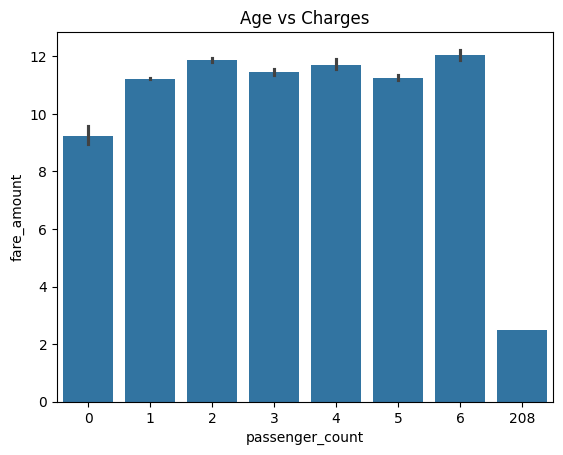

In [42]:

plt.title("Age vs Charges")
sns.barplot(data=df,x="passenger_count",y="fare_amount",)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_df , val_df = train_test_split(df, test_size=0.2,random_state=42)

In [45]:
len(train_df),len(val_df)

(441960, 110490)

In [46]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,1.324242
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2.326965
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2.560520
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,1.244048
...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,1.550950
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,7.121000
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,3.253644
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2.147450


In [47]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2.911621
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,1.434692
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,20.145134
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,16.162235
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,1.800684
...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,1.766068
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2.752970
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,0.000000
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,9.182614


In [48]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance_km'],
      dtype='object')

In [49]:
input_cols = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance_km']

In [50]:
target_col =['fare_amount']

In [51]:
train_inputs = train_df[input_cols]

In [52]:
train_targets = train_df[target_col]

In [53]:
val_inputs = val_df[input_cols]

In [54]:
val_targets = val_df[target_col]

In [55]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [56]:
test_inputs = test_df[input_cols]

In [57]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323358
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425299
2,-73.982521,40.751259,-73.979652,40.746140,1,0.618403
3,-73.981163,40.767807,-73.990448,40.751637,1,1.960912
4,-73.966049,40.789776,-73.988564,40.744427,1,5.387211
...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2.124599
9910,-73.945511,40.803600,-73.960213,40.776371,6,3.271138
9911,-73.991600,40.726608,-73.789742,40.647011,6,19.183577
9912,-73.985573,40.735432,-73.939178,40.801731,6,8.343392


In [58]:
class MeanRegressor():
  def fit(self,inputs,targets):
    self.mean =targets.mean()
  def predict(self,inputs):
    return np.full(inputs.shape[0],self.mean)

In [59]:
mean_model = MeanRegressor()

In [60]:
mean_model.fit(train_inputs,train_targets)

In [61]:
mean_model.mean

,0
fare_amount,11.354714


In [62]:
train_preds = mean_model.predict(train_inputs)

In [63]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [64]:
val_preds =  mean_model.predict(val_inputs)

In [65]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
def rmse(targets,preds):
  return np.sqrt(mean_squared_error(targets,preds))

In [68]:
train_rmse = rmse(train_targets,train_preds)

In [69]:
train_rmse

np.float64(9.789781840838485)

In [70]:
val_rmse = rmse(val_targets,val_preds)
val_rmse

np.float64(9.89995425435296)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_model = LinearRegression()


In [73]:
linear_model.fit(train_inputs,train_targets)

LinearRegression()

In [74]:
train_preds = linear_model.predict(train_inputs)
train_preds

array([[11.341894],
       [11.340974],
       [11.34259 ],
       ...,
       [11.343234],
       [11.342466],
       [11.342571]], dtype=float32)

In [75]:
val_preds = linear_model.predict(val_inputs)
val_preds

array([[11.342997],
       [11.34197 ],
       [11.354969],
       ...,
       [11.341513],
       [11.347353],
       [11.342152]], dtype=float32)

In [76]:
train_rmse = rmse(train_targets,train_preds)
train_rmse

np.float64(9.786379897916678)

In [77]:
val_rmse = rmse(val_targets,val_preds)
val_rmse

np.float64(9.895012001620161)

In [78]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323358
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425299
2,-73.982521,40.751259,-73.979652,40.746140,1,0.618403
3,-73.981163,40.767807,-73.990448,40.751637,1,1.960912
4,-73.966049,40.789776,-73.988564,40.744427,1,5.387211
...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2.124599
9910,-73.945511,40.803600,-73.960213,40.776371,6,3.271138
9911,-73.991600,40.726608,-73.789742,40.647011,6,19.183577
9912,-73.985573,40.735432,-73.939178,40.801731,6,8.343392


In [79]:
test_preds = linear_model.predict(test_inputs)

In [80]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [81]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [82]:
def generate_submission(inputs,preds,fname):
  sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount'] = preds
  sub_df.to_csv(fname,index=None)

In [83]:
generate_submission(test_inputs, test_preds,'linear_submission.csv')

In [84]:
def add_dateparts(df,col):
  df[col +'_year'] = df[col].dt.year
  df[col +'_month'] = df[col].dt.month
  df[col+'_day'] = df[col].dt.day
  df[col+'_weekday'] = df[col].dt.weekday
  df[col+'_hour'] = df[col].dt.hour

In [85]:
add_dateparts(train_df,'pickup_datetime')

In [86]:
add_dateparts(val_df,'pickup_datetime')

In [87]:
add_dateparts(test_df,'pickup_datetime')

In [88]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,1.324242,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,0.000000,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2.326965,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2.560520,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,1.244048,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,1.550950,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,7.121000,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,3.253644,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2.147450,2011,2,17,3,18


In [89]:
jfk_lonlat =-73.7781 ,40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126
sol_lonlat = -74.014479, 40.702607
esb_lonlat = -73.984938,40.748037
ws_lonlat = -74.008540,40.705905

In [90]:
def add_landmark_dropoff_distance(df,landmark_name,landmark_lonlat):
  lon,lat = landmark_lonlat
  df[landmark_name+'_drop_distance'] = distance_cal(lon,lat,df['dropoff_longitude'],df['dropoff_latitude'])

In [91]:
for a_df in [train_df,val_df,test_df]:
  for name,lonlat in [('jfk',jfk_lonlat),('lga',lga_lonlat),('ewr',ewr_lonlat),('met',met_lonlat),('wtc',wtc_lonlat),('sol',sol_lonlat),('esb',esb_lonlat),('ws',ws_lonlat)]:
    add_landmark_dropoff_distance(a_df,name,lonlat)

In [92]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_datetime_year,pickup_datetime_month,...,pickup_datetime_weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
124331,3.700000,2011-12-05 18:34:38+00:00,-73.994072,40.732468,-73.997498,40.731689,1,0.301602,2011,12,...,0,18,21.053379,11.553353,15.639419,6.040450,2.366158,3.536361,2.103415,3.014353
227449,5.300000,2012-08-24 19:27:00+00:00,-73.994614,40.746056,-74.003387,40.732533,1,1.675494,2012,8,...,4,19,21.534813,11.962767,15.195935,6.213814,2.283555,3.456490,2.321208,2.992568
330643,6.500000,2014-02-24 10:18:47+00:00,-73.977798,40.752197,-73.979790,40.739697,1,1.400279,2014,2,...,0,10,20.220650,9.823564,17.334177,4.630555,3.939173,5.055115,1.024146,4.470835
463989,8.500000,2012-09-09 09:20:00+00:00,-73.985039,40.753963,-73.986336,40.772118,5,2.021661,2012,9,...,6,9,22.796947,9.474340,18.324276,2.109524,6.909464,8.084715,2.680151,7.596389
146184,31.299999,2010-06-03 09:48:04+00:00,-73.862961,40.769165,-73.980385,40.782181,1,9.992553,2010,6,...,3,9,23.153711,8.976451,19.331799,1.479095,8.127042,9.302936,3.815990,8.807071


In [93]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [94]:
train_df = remove_outliers(train_df)

In [95]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
count,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000
mean,11.347895,-73.975121,40.750957,-73.974342,40.751324,1.690374,3.332607,2011.737524,6.266821,15.732629,3.035066,13.506704,20.926352,9.699113,18.486441,4.500296,5.971693,6.993507,3.352299,6.484950
std,9.713450,0.045488,0.093586,0.045281,0.094919,1.306414,3.743806,1.862116,3.436091,8.697833,1.950459,6.516894,3.106893,3.093128,3.761057,3.807073,3.997121,3.999340,3.716497,3.984497
min,1.000000,-74.839172,40.063896,-74.843079,40.054207,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.305775,0.116475,0.129327,0.031215,0.009287,0.016908,0.001276,0.005537
25%,6.000000,-73.992249,40.736530,-73.991592,40.735497,1.000000,1.254170,2010.000000,3.000000,8.000000,1.000000,9.000000,20.531890,8.328574,16.487762,2.141530,3.588014,4.619931,1.355024,4.111016
50%,8.500000,-73.982101,40.753319,-73.980606,40.753765,1.000000,2.154608,2012.000000,6.000000,16.000000,3.000000,14.000000,21.186927,9.526770,17.970078,3.723200,5.492139,6.593288,2.347718,6.082475
75%,12.500000,-73.968399,40.767437,-73.965401,40.768360,2.000000,3.919679,2013.000000,9.000000,23.000000,5.000000,19.000000,21.912136,10.993076,19.797519,5.910599,7.645819,8.751379,4.190085,8.202292
max,400.000000,-72.982796,41.787712,-72.935562,41.806301,6.000000,113.545914,2015.000000,12.000000,31.000000,6.000000,23.000000,130.446030,114.696861,125.454018,114.186371,121.681587,122.805336,117.689888,122.421783


In [96]:
val_df = remove_outliers(val_df)


In [97]:
val_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
count,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000,107742.000000
mean,11.325958,-73.975060,40.751095,-73.974396,40.751419,1.692645,3.327243,2011.740361,6.270498,15.709937,3.045590,13.514275,20.936720,9.705519,18.483580,4.487328,5.966548,6.989724,3.347187,6.480825
std,9.776917,0.043996,0.030242,0.043632,0.033147,1.308875,3.762641,1.866839,3.435246,8.673656,1.950012,6.504395,3.164411,3.134155,3.823793,3.862188,4.059213,4.062872,3.770309,4.047964
min,2.500000,-74.934593,40.190563,-74.946442,40.190563,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.109089,0.262793,0.278406,0.071055,0.013647,0.019015,0.004357,0.013783
25%,6.000000,-73.992226,40.736599,-73.991692,40.735622,1.000000,1.258210,2010.000000,3.000000,8.000000,1.000000,9.000000,20.540658,8.321241,16.478888,2.126997,3.579430,4.613253,1.360730,4.106759
50%,8.500000,-73.982101,40.753429,-73.980663,40.753899,1.000000,2.161788,2012.000000,6.000000,16.000000,3.000000,14.000000,21.190770,9.534434,17.969180,3.697403,5.496485,6.597079,2.346754,6.085197
75%,12.500000,-73.968292,40.767558,-73.965492,40.768410,2.000000,3.902829,2013.000000,9.000000,23.000000,5.000000,19.000000,21.915192,11.001003,19.795765,5.876132,7.658065,8.763031,4.193071,8.213988
max,499.000000,-72.471581,41.667648,-72.113823,41.683929,6.000000,104.123650,2015.000000,12.000000,31.000000,6.000000,23.000000,141.100494,151.038193,174.871140,158.487686,161.335129,161.593140,159.758911,161.136414


In [98]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'distance_km',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance','sol_drop_distance', 'esb_drop_distance', 'ws_drop_distance']

In [99]:
target_col = 'fare_amount'

In [100]:
train_inputs = train_df[input_cols].copy()

In [101]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
353352,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.324242,20.254116,9.562360,17.575472,4.303088,4.264362,5.384844,0.862684,4.802174
360070,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,20.410336,11.648447,15.723021,6.618160,1.901412,3.001001,2.713288,2.419664
372609,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.326965,20.907944,8.197413,19.056858,2.080724,6.406889,7.556468,1.981741,6.991350
550895,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.560520,22.336796,8.824705,18.914021,1.504005,7.172842,8.348143,2.782388,7.832386
444151,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.244048,21.671713,10.293079,16.874496,3.989460,4.492203,5.668061,0.582400,5.161592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.550950,21.694336,8.978841,18.393261,2.245648,6.193861,7.365249,1.753340,6.834232
259178,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.121000,21.160210,14.015720,13.752449,9.002061,0.596880,0.592066,5.063739,0.445607
365838,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.253644,19.911892,11.597153,15.943617,6.917923,1.907342,2.879267,3.084418,2.265844
131932,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.147450,21.708715,10.240374,16.938427,3.892233,4.596889,5.772810,0.615277,5.266925


In [102]:
val_inputs= val_df[input_cols].copy()

In [103]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
15971,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9,2.911621,19.752426,9.389700,17.801201,4.568507,4.241548,5.317422,1.374722,4.716331
149839,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15,1.434692,20.690660,9.064166,18.070211,3.319049,5.149665,6.295788,0.820423,5.729326
515867,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14,20.145134,0.968947,16.227798,33.013813,20.929432,20.163309,20.154303,20.126892,19.797438
90307,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19,16.162235,17.254362,12.708667,17.052473,9.949621,4.035523,3.818400,6.521397,3.523596
287032,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18,1.800684,21.690598,10.324791,16.842825,4.015712,4.471768,5.647744,0.604724,5.142943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506435,-73.959457,40.774727,-73.966301,40.772179,1,2010,5,30,6,10,0.642167,21.527943,7.789631,19.806591,0.843992,7.575274,8.736434,3.109755,8.183743
467556,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20,1.766068,21.112535,9.686866,17.454075,3.683467,4.721889,5.886303,0.255187,5.342861
19482,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0,2.752970,20.167421,10.706016,16.562214,5.691929,2.893411,3.988512,1.877126,3.398378
382260,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16,9.182614,16.797291,0.312546,27.130733,7.651216,13.449601,14.368798,9.902818,13.749022


In [104]:
test_inputs = test_df[input_cols].copy()

In [105]:
train_target,val_target = train_df[target_col].copy(),val_df[target_col].copy()

In [106]:
train_inputs.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_datetime_year',
       'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'distance_km',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance', 'sol_drop_distance',
       'esb_drop_distance', 'ws_drop_distance'],
      dtype='object')

In [107]:
numeric_cols =['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_datetime_year',
       'pickup_datetime_month', 'pickup_datetime_day', 'pickup_datetime_hour', 'distance_km',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance', 'sol_drop_distance',
       'esb_drop_distance', 'ws_drop_distance']

In [108]:
categorical_cols =['pickup_datetime_weekday']

In [109]:
train_inputs[numeric_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
353352,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,3,1.324242,20.254116,9.562360,17.575472,4.303088,4.264362,5.384844,0.862684,4.802174
360070,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,19,0.000000,20.410336,11.648447,15.723021,6.618160,1.901412,3.001001,2.713288,2.419664
372609,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,10,2.326965,20.907944,8.197413,19.056858,2.080724,6.406889,7.556468,1.981741,6.991350
550895,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,13,2.560520,22.336796,8.824705,18.914021,1.504005,7.172842,8.348143,2.782388,7.832386
444151,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,15,1.244048,21.671713,10.293079,16.874496,3.989460,4.492203,5.668061,0.582400,5.161592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,16,1.550950,21.694336,8.978841,18.393261,2.245648,6.193861,7.365249,1.753340,6.834232
259178,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,9,7.121000,21.160210,14.015720,13.752449,9.002061,0.596880,0.592066,5.063739,0.445607
365838,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,19,3.253644,19.911892,11.597153,15.943617,6.917923,1.907342,2.879267,3.084418,2.265844
131932,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,18,2.147450,21.708715,10.240374,16.938427,3.892233,4.596889,5.772810,0.615277,5.266925


In [110]:
val_inputs[numeric_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
15971,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,9,2.911621,19.752426,9.389700,17.801201,4.568507,4.241548,5.317422,1.374722,4.716331
149839,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,15,1.434692,20.690660,9.064166,18.070211,3.319049,5.149665,6.295788,0.820423,5.729326
515867,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,14,20.145134,0.968947,16.227798,33.013813,20.929432,20.163309,20.154303,20.126892,19.797438
90307,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,19,16.162235,17.254362,12.708667,17.052473,9.949621,4.035523,3.818400,6.521397,3.523596
287032,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,18,1.800684,21.690598,10.324791,16.842825,4.015712,4.471768,5.647744,0.604724,5.142943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506435,-73.959457,40.774727,-73.966301,40.772179,1,2010,5,30,10,0.642167,21.527943,7.789631,19.806591,0.843992,7.575274,8.736434,3.109755,8.183743
467556,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,20,1.766068,21.112535,9.686866,17.454075,3.683467,4.721889,5.886303,0.255187,5.342861
19482,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,2.752970,20.167421,10.706016,16.562214,5.691929,2.893411,3.988512,1.877126,3.398378
382260,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,16,9.182614,16.797291,0.312546,27.130733,7.651216,13.449601,14.368798,9.902818,13.749022


In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [114]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [115]:
val_inputs[numeric_cols]= scaler.transform(val_inputs[numeric_cols])

In [116]:
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [117]:
train_inputs[numeric_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
353352,0.455468,0.393108,0.453524,0.392756,0.6,1.000000,0.272727,0.366667,0.130435,0.011663,0.153283,0.082439,0.139208,0.037422,0.034972,0.043717,0.007319,0.039183
360070,0.455386,0.383268,0.445225,0.382612,0.0,0.333333,0.000000,0.833333,0.826087,0.000000,0.154484,0.100645,0.124426,0.057702,0.015551,0.024303,0.023044,0.019721
372609,0.474048,0.415853,0.458168,0.403531,0.0,0.500000,0.818182,0.066667,0.434783,0.020494,0.158307,0.070526,0.151028,0.017954,0.052581,0.061403,0.016828,0.057066
550895,0.477805,0.417710,0.453172,0.410021,0.0,0.500000,0.181818,0.433333,0.565217,0.022551,0.169287,0.076001,0.149888,0.012902,0.058876,0.067850,0.023631,0.063936
444151,0.464378,0.396178,0.446641,0.397352,0.2,0.500000,0.090909,0.133333,0.652174,0.010956,0.164176,0.088816,0.133614,0.034674,0.036844,0.046024,0.004938,0.042119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.458970,0.398382,0.452948,0.404637,0.0,0.000000,0.727273,0.166667,0.695652,0.013659,0.164350,0.077346,0.145733,0.019398,0.050830,0.059846,0.014887,0.055783
259178,0.466778,0.406160,0.435070,0.373058,0.2,0.000000,0.272727,0.366667,0.391304,0.062715,0.160246,0.121306,0.108703,0.078585,0.004829,0.004684,0.043016,0.003595
365838,0.456368,0.397880,0.447301,0.380313,0.4,0.500000,0.545455,0.366667,0.826087,0.028655,0.150654,0.100198,0.126187,0.060328,0.015600,0.023311,0.026197,0.018464
131932,0.468718,0.404627,0.446793,0.397879,0.0,0.333333,0.090909,0.533333,0.782609,0.018913,0.164461,0.088356,0.134124,0.033823,0.037705,0.046877,0.005217,0.042979


In [118]:
val_inputs[numeric_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
15971,0.454293,0.403346,0.455776,0.390892,0.0,1.000000,0.363636,0.600000,0.391304,0.025643,0.149428,0.080932,0.141009,0.039747,0.034784,0.043168,0.011670,0.038482
149839,0.464230,0.391247,0.454484,0.397809,0.0,0.166667,0.272727,0.300000,0.652174,0.012635,0.156638,0.078091,0.143155,0.028801,0.042248,0.051136,0.006960,0.046757
515867,0.460716,0.397707,0.553551,0.338131,0.0,0.000000,0.545455,0.800000,0.608696,0.177418,0.005096,0.140612,0.262394,0.183069,0.165642,0.164001,0.171007,0.161677
90307,0.564744,0.336212,0.456524,0.362980,0.0,0.333333,0.909091,0.333333,0.826087,0.142341,0.130233,0.109898,0.135034,0.086885,0.033091,0.030960,0.055401,0.028738
287032,0.464658,0.404943,0.446453,0.397297,0.2,1.000000,0.181818,0.266667,0.782609,0.015859,0.164321,0.089093,0.133362,0.034904,0.036676,0.045858,0.005127,0.041967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506435,0.473888,0.412359,0.459644,0.409779,0.0,0.166667,0.363636,0.966667,0.434783,0.005656,0.163072,0.066967,0.157010,0.007120,0.062183,0.071013,0.026413,0.066807
467556,0.468981,0.404534,0.450676,0.397132,0.4,0.166667,0.272727,0.066667,0.869565,0.015554,0.159880,0.083526,0.138239,0.031994,0.038732,0.047801,0.002157,0.043600
19482,0.459200,0.401449,0.449392,0.386374,0.0,0.166667,0.272727,0.833333,0.000000,0.024245,0.152617,0.092420,0.131123,0.049588,0.023704,0.032345,0.015939,0.027716
382260,0.462792,0.404009,0.508771,0.410990,0.0,0.333333,0.545455,0.200000,0.695652,0.080871,0.126721,0.001711,0.215452,0.066751,0.110463,0.116883,0.084133,0.112268


In [119]:
test_inputs[numeric_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,distance_km,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance,sol_drop_distance,esb_drop_distance,ws_drop_distance
0,0.466421,0.406023,0.451712,0.393602,0.0,1.000000,0.000000,0.866667,0.565217,0.020462,0.155848,0.084219,0.137470,0.036887,0.034618,0.043548,0.004689,0.039138
1,0.459126,0.380254,0.442561,0.390957,0.0,1.000000,0.000000,0.866667,0.565217,0.021360,0.163353,0.097806,0.125037,0.046910,0.025403,0.034685,0.013005,0.030919
2,0.461464,0.398745,0.452644,0.394917,0.0,0.333333,0.818182,0.233333,0.478261,0.005446,0.155995,0.082181,0.139308,0.034322,0.037051,0.045964,0.004177,0.041561
3,0.462196,0.408345,0.446985,0.398055,0.0,0.500000,1.000000,0.000000,0.913043,0.017270,0.164417,0.088017,0.134459,0.033420,0.038059,0.047227,0.005198,0.043321
4,0.470337,0.421089,0.447973,0.393940,0.0,0.500000,1.000000,0.000000,0.913043,0.047445,0.159993,0.088897,0.133171,0.038591,0.032550,0.041703,0.004275,0.037551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,0.469219,0.425278,0.465231,0.414465,1.0,1.000000,0.363636,0.300000,0.521739,0.018711,0.163016,0.059074,0.166758,0.005386,0.072376,0.081048,0.037053,0.076783
9910,0.481401,0.429109,0.462835,0.412172,1.0,1.000000,0.000000,0.366667,0.739130,0.028809,0.162670,0.062341,0.162362,0.003411,0.067600,0.076337,0.032077,0.072086
9911,0.456573,0.384445,0.552203,0.338340,1.0,1.000000,0.272727,0.600000,0.869565,0.168950,0.006639,0.139449,0.260632,0.181473,0.163858,0.162216,0.169287,0.159894
9912,0.459820,0.389563,0.473862,0.426646,1.0,1.000000,0.000000,1.000000,0.043478,0.073480,0.169899,0.052591,0.185886,0.027783,0.094961,0.103430,0.060368,0.099223


In [120]:
from sklearn.preprocessing import OneHotEncoder

In [121]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [122]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [123]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [124]:
train_inputs[encoded_cols]

,pickup_datetime_weekday_0,pickup_datetime_weekday_1,pickup_datetime_weekday_2,pickup_datetime_weekday_3,pickup_datetime_weekday_4,pickup_datetime_weekday_5,pickup_datetime_weekday_6
353352,0.0,0.0,0.0,0.0,0.0,0.0,1.0
360070,0.0,0.0,1.0,0.0,0.0,0.0,0.0
372609,0.0,0.0,1.0,0.0,0.0,0.0,0.0
550895,0.0,0.0,1.0,0.0,0.0,0.0,0.0
444151,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
110268,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259178,0.0,0.0,0.0,0.0,0.0,0.0,1.0
365838,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131932,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [125]:
val_inputs[encoded_cols]

,pickup_datetime_weekday_0,pickup_datetime_weekday_1,pickup_datetime_weekday_2,pickup_datetime_weekday_3,pickup_datetime_weekday_4,pickup_datetime_weekday_5,pickup_datetime_weekday_6
15971,0.0,1.0,0.0,0.0,0.0,0.0,0.0
149839,0.0,0.0,0.0,0.0,0.0,1.0,0.0
515867,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90307,0.0,0.0,0.0,0.0,1.0,0.0,0.0
287032,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
506435,0.0,0.0,0.0,0.0,0.0,0.0,1.0
467556,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19482,1.0,0.0,0.0,0.0,0.0,0.0,0.0
382260,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
test_inputs[encoded_cols]

,pickup_datetime_weekday_0,pickup_datetime_weekday_1,pickup_datetime_weekday_2,pickup_datetime_weekday_3,pickup_datetime_weekday_4,pickup_datetime_weekday_5,pickup_datetime_weekday_6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
9909,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9910,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9911,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9912,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [127]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [128]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,distance_km,...,sol_drop_distance,esb_drop_distance,ws_drop_distance,pickup_datetime_weekday_0,pickup_datetime_weekday_1,pickup_datetime_weekday_2,pickup_datetime_weekday_3,pickup_datetime_weekday_4,pickup_datetime_weekday_5,pickup_datetime_weekday_6
353352,0.455468,0.393108,0.453524,0.392756,0.6,1.000000,0.272727,0.366667,0.130435,0.011663,...,0.043717,0.007319,0.039183,0.0,0.0,0.0,0.0,0.0,0.0,1.0
360070,0.455386,0.383268,0.445225,0.382612,0.0,0.333333,0.000000,0.833333,0.826087,0.000000,...,0.024303,0.023044,0.019721,0.0,0.0,1.0,0.0,0.0,0.0,0.0
372609,0.474048,0.415853,0.458168,0.403531,0.0,0.500000,0.818182,0.066667,0.434783,0.020494,...,0.061403,0.016828,0.057066,0.0,0.0,1.0,0.0,0.0,0.0,0.0
550895,0.477805,0.417710,0.453172,0.410021,0.0,0.500000,0.181818,0.433333,0.565217,0.022551,...,0.067850,0.023631,0.063936,0.0,0.0,1.0,0.0,0.0,0.0,0.0
444151,0.464378,0.396178,0.446641,0.397352,0.2,0.500000,0.090909,0.133333,0.652174,0.010956,...,0.046024,0.004938,0.042119,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.458970,0.398382,0.452948,0.404637,0.0,0.000000,0.727273,0.166667,0.695652,0.013659,...,0.059846,0.014887,0.055783,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259178,0.466778,0.406160,0.435070,0.373058,0.2,0.000000,0.272727,0.366667,0.391304,0.062715,...,0.004684,0.043016,0.003595,0.0,0.0,0.0,0.0,0.0,0.0,1.0
365838,0.456368,0.397880,0.447301,0.380313,0.4,0.500000,0.545455,0.366667,0.826087,0.028655,...,0.023311,0.026197,0.018464,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131932,0.468718,0.404627,0.446793,0.397879,0.0,0.333333,0.090909,0.533333,0.782609,0.018913,...,0.046877,0.005217,0.042979,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [141]:
def evaluate(model):
  train_preds = model.predict(X_train)
  train_rmse =rmse(train_target,train_preds)
  val_preds = model.predict(X_val)
  val_rmse = rmse(val_target,val_preds)
  return train_rmse,val_rmse

In [132]:
from  sklearn.linear_model import Ridge

In [142]:
model1 = Ridge(random_state=42,alpha=0.9)

In [144]:
model1.fit(X_train,train_target)

Ridge(alpha=0.9, random_state=42)

In [145]:
evaluate(model1)

(np.float64(5.034751381496246), np.float64(5.2059142347742995))

In [146]:
generate_submission(X_test,model1.predict(X_test),'ridge_submission.csv')